* LogisticRegression & LinearSVC(Support Vector Machine) 분류 알고리즘

In [5]:
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['text.color'] = 'black'

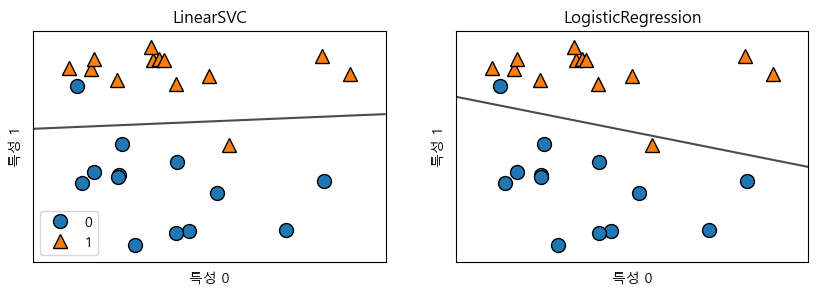

In [6]:
# 결정 경계 : xy평면도에 예측을 식으로 칠함
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    # 결정 경계 그리기
    mglearn.plots.plot_2d_separator(
        clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()
